In [41]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [42]:
data = pd.read_csv("atlantis_citizens_final.csv")
data = data.dropna(subset=["Occupation"])

In [43]:
data["Wealth_Index"] = (
    data.groupby("District_Name")["Wealth_Index"]
        .transform(lambda x: x.fillna(x.median()))
)

data["House_Size_sq_ft"] = (
    data.groupby("District_Name")["House_Size_sq_ft"]
        .transform(lambda x: x.fillna(x.median()))
)

data["Life_Expectancy"] = (
    data.groupby("District_Name")["Life_Expectancy"]
        .transform(lambda x: x.fillna(x.median()))
)

In [44]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=["Citizen_ID","Occupation","Bio_Hash"])

X = pd.get_dummies(X,drop_first=False).astype(np.float32)
X_np = StandardScaler().fit_transform(X)

manual_encoding = {
    "Fisher" : 2,
    "Miner" : 3,
    "Merchant" : 1,
    "Warrior" : 0,
    "Scribe" :4
}

Y = data['Occupation'].map(manual_encoding).to_numpy()

In [45]:
model = Sequential([
    tf.keras.Input(shape=(X_np.shape[1],)),
    Dense(units=30, activation='sigmoid'),
    Dense(units=15, activation='sigmoid'),
    Dense(units=len(np.unique(Y)), activation='softmax'),
])

In [46]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 30)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 5)              │            80 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,145 (4.47 KB)

 Trainable params: 1,145 (4.47 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

history = model.fit(
    X_np,
    Y,
    epochs=100,

)

Epoch 1/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 820us/step - accuracy: 0.4310 - loss: 1.3934
Epoch 2/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.5668 - loss: 1.0979
Epoch 3/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6057 - loss: 0.9685
Epoch 4/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.6207 - loss: 0.9207
Epoch 5/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.6238 - loss: 0.9027
Epoch 6/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.6271 - loss: 0.8953
Epoch 7/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.6280 - loss: 0.8920
Epoch 8/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.6295 - loss: 0.8900
Epoch 9/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - accuracy: 0.6290 - loss: 0.8877
Epoch 10/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.6311 - loss: 0.8865
Epoch 11/100
493/493 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.6313 - loss: 0.8848
Epoch 12/100
493/49

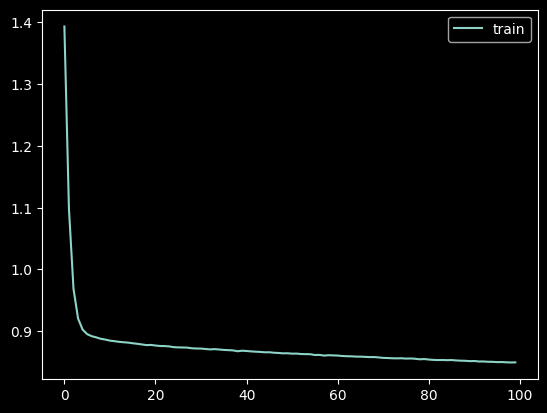

In [50]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="train")
plt.legend()
plt.show()
# This cell is to show the plot of loss with respect to the no. of epochs.

In [51]:
test_data = pd.read_csv("test_atlantis_hidden.csv")
X_test = test_data.drop(columns=["Bio_Hash", "Citizen_ID"])

X_test = pd.get_dummies(X_test,drop_first=False).astype(np.float32).to_numpy()
X_test = StandardScaler().fit_transform(X_test)

y_test_probs = model.predict(X_test, batch_size=32)
y_test_pred = np.argmax(y_test_probs, axis=1)
df = pd.DataFrame({
    "Citizen_ID": test_data["Citizen_ID"],
    "Occupation": y_test_pred
})
df.to_csv("prediction.csv", index=False)

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step
